In [1]:
energy_threshold = 'results1GeVSparseEnergyBinsAfterReviewSysLo'

In [2]:
!ls -1 /lfs/l2/hawc/users/vikasj78/J1809-193_Analysis/fermi/data/*PH*.fits > ../results1GeVSparseEnergyBinsAfterReviewSysLo/ft1.txt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import fermipy
from fermipy.plotting import plot_markers
from astropy.coordinates import SkyCoord
from fermipy.plotting import ROIPlotter
from importlib import reload

In [4]:
reload(fermipy.plotting)
from fermipy.plotting import ROIPlotter

In [5]:
plots_dir = f'../{energy_threshold}/plots/'

In [6]:
#best fit hess components locations 
hess_comp1_ra = 272.551 #deg
hess_comp1_dec = -19.344 #deg
hess_comp1_sigma = 0.622 #semi-major axis deg
hess_comp1_ecc = 0.824
hess_comp1_position_angle = 50.0 #deg

hess_comp2_ra = 272.400 #deg
hess_comp2_dec = -19.406 #deg
hess_comp2_sigma = 0.0953 #deg

In [7]:
# Some coordinates
pos_psr_j1809_1917 = SkyCoord((18.+9./60+43.147/3600)*15, -19.-17./60-38.1/3600, unit='deg', frame='icrs')
pos_psr_j1811_1925 = SkyCoord((18.+11./60+29.15/3600)*15, -19.-25./60-25.4/3600, unit='deg', frame='icrs')

pos_snr_g011d0_00d0 = SkyCoord(18.1663*15, -19.4160, unit='deg', frame='icrs')
rad_snr_g011d0_00d0 = 0.0919

pos_snr_g011d1_00d1 = SkyCoord(18.1612*15, -19.2012, unit='deg', frame='icrs')
rad_snr_g011d1_00d1 = 0.1018

pos_snr_g011d2_0d3 = SkyCoord((18.+11./60+28.9/3600)*15, -19.-25./60-29./3600, unit='deg', frame='icrs')
rad_snr_g011d2_0d3 = 0.5 * 4.33 / 60
pos_xte_j1810_197 = SkyCoord((18.+9./60+51.07/3600)*15, -19.-43./60-51.8/3600, unit='deg', frame='icrs')

hess_comp1 = SkyCoord(hess_comp1_ra, hess_comp1_dec, unit='deg', frame='icrs')
hess_comp2 = SkyCoord(hess_comp2_ra, hess_comp2_dec, unit='deg', frame='icrs')
rad_hess_comp2 = hess_comp2_sigma

In [8]:
def plot_psr_snr(pl):
    plot_markers(pos_psr_j1809_1917.ra.deg, pos_psr_j1809_1917.dec.deg,marker='v',color='green', label='PSR J1809-1917')
    plot_markers(pos_psr_j1811_1925.ra.deg, pos_psr_j1811_1925.dec.deg,marker='v',color='blue', label='PSR J1811-1925')
    plot_markers(hess_comp1.ra.deg, hess_comp1.dec.deg, marker='o', color='magenta', label = 'HESS Comp 1')
    plot_markers(hess_comp2.ra.deg, hess_comp2.dec.deg, marker='o', color='springgreen', label = 'HESS Comp 2')
    pl.draw_circle(skydir=hess_comp2,radius=rad_hess_comp2,edgecolor='springgreen',linewidth=2,linestyle='-')
    pl.draw_circle(skydir=pos_snr_g011d0_00d0,radius=rad_snr_g011d0_00d0,edgecolor='cyan',linewidth=2,linestyle='-')
    pl.draw_circle(skydir=pos_snr_g011d1_00d1,radius=rad_snr_g011d1_00d1,edgecolor='cyan',linewidth=2,linestyle='-')
    pl.draw_circle(skydir=pos_snr_g011d2_0d3,radius=rad_snr_g011d2_0d3,edgecolor='cyan',linewidth=2,linestyle='-')

In [9]:
levels_wo_source = [-5,-3,3,5,7,9]
levels_with_source = [-5,-3,3,5,7,9,11,13,15]

In [10]:
def plot_sig_ex_maps(map_obj, levels, name):
    o = map_obj
    fig = plt.figure(figsize=(14,6))
    sig = ROIPlotter(o['sigma'],roi=gta.roi)
    sig.plot(vmin=-5,vmax=5,levels=levels,subplot=121,cmap='RdBu_r',zoom=8)
    plot_psr_snr(sig)
    plt.gca().set_title('Significance')
    plt.legend(ncol=2,loc='upper center', bbox_to_anchor=(0.5, 1.24))
    ex = ROIPlotter(o['excess'],roi=gta.roi)
    ex.plot(vmin=-200,vmax=2000,subplot=122,cmap='RdBu_r',zoom=8)
    plot_psr_snr(ex)
    plt.gca().set_title('Excess Counts')
    plt.legend(ncol=2,loc='upper center', bbox_to_anchor=(0.5, 1.24))
    plt.savefig(plots_dir + f"{name}.png",bbox_inches='tight')
    plt.savefig(plots_dir + f"{name}.pdf",bbox_inches='tight')

In [11]:
def plot_extension(ext_obj, name):
    plt.figure(figsize=(8,6))
    plt.plot(ext_obj['width'],ext_obj['dloglike'],marker='o')
    plt.gca().set_xlabel('Width [deg]')
    plt.gca().set_ylabel('Delta Log-Likelihood')
    plt.gca().axvline(ext_obj['ext'])
    plt.gca().axvspan(ext_obj['ext']-ext_obj['ext_err_lo'],ext_obj['ext']+ext_obj['ext_err_hi'],
                          alpha=0.2,label='This Measurement',color='b')

    plt.gca().axvline(0.5,color='k')
    plt.gca().axvspan(0.5-0.15,0.5+0.15,alpha=0.2,label='Araya et. al. 2018',color='k')
    plt.gca().set_ylim(0.0,80)
    plt.gca().set_xlim(0.25,0.75)

    plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
                (ext_obj['ts_ext'],ext_obj['ext'],ext_obj['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
    plt.gca().legend(frameon=False)
    plt.savefig(plots_dir + f"{name}.png",bbox_inches='tight')
    plt.savefig(plots_dir + f"{name}.pdf",bbox_inches='tight')

In [12]:
def plot_spectrum(result_name, sed, source_name):
    c = np.load(f'../{energy_threshold}/{result_name}.npy',allow_pickle=True).flat[0]
    E = np.array(c['sources'][source_name]['model_flux']['energies'])
    dnde = np.array(c['sources'][source_name]['model_flux']['dnde'])
    dnde_hi = np.array(c['sources'][source_name]['model_flux']['dnde_hi'])
    dnde_lo = np.array(c['sources'][source_name]['model_flux']['dnde_lo'])
    uplim_mask = sed['ts'] > 2
    plt.loglog(E, (E**2)*dnde, 'k--')
    plt.loglog(E, (E**2)*dnde_hi, 'k')
    plt.loglog(E, (E**2)*dnde_lo, 'k')
    plt.errorbar(sed['e_ctr'][uplim_mask],
                 sed['e2dnde'][uplim_mask], 
                 yerr=sed['e2dnde_err'][uplim_mask], fmt ='o')
    plt.errorbar(np.array(sed['e_ctr'][~uplim_mask]),
             sed['e2dnde_ul95'][~uplim_mask], yerr=0.2*sed['e2dnde_ul95'][~uplim_mask], 
                 fmt='o', uplims=True)
    plt.xlabel('E [MeV]')
    plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
    source_name = source_name.replace(" ", "_")
    plt.savefig(plots_dir + f"spectrum_{result_name}_{source_name}.png",bbox_inches='tight')
    plt.savefig(plots_dir + f"spectrum_{result_name}_{source_name}.pdf",bbox_inches='tight')

In [13]:
from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis(f'../{energy_threshold}/config.yaml',logging={'verbosity': 3})
matplotlib.interactive(True)

2023-02-02 12:06:57 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.1.5 
ScienceTools version 2.2.0


In [14]:
gta.compute_drm(overwrite=True)

2023-02-02 12:07:07 INFO    GTBinnedAnalysis._drm_app(): Computing drm for component 00.
2023-02-02 12:07:08 INFO    GTBinnedAnalysis.run_gtapp(): Running gtdrm.
2023-02-02 12:07:08 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtdrm cmap=/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/ccube_00.fits outfile=/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/drm_00.fits irfs="P8R3_SOURCE_V2" evtype=3 expcube=/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/ltcube_00.fits bexpmap=/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/bexpmap_00.fits edisp_bins=1 wmap=none convol=yes resample=yes rfactor=2 minbinsz=0.1 ptsrc=yes psfcorr=yes chatter=2 clobber=yes debug=no gui=no mode="ql"
2023-02-02 12:07:08 INFO    GTBinnedAnaly

In [15]:
gta.setup()

2023-02-02 12:07:15 INFO    GTAnalysis.setup(): Running setup.
2023-02-02 12:07:15 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2023-02-02 12:07:15 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2023-02-02 12:07:15 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2023-02-02 12:07:16 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54682.655289 from DATE-OBS.
Set MJD-END to 59214.000000 from DATE-END'. [astropy.wcs.wcs]
2023-02-02 12:07:16 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2023-02-02 12:07:16 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2023-02-02 12:07:16 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.


Drm_Cache::update Measured counts < 0 4FGL J1737.6-2350 14 -5.24262e-12 3.48683e-11
1.32794 0.364343 0.0870916 0.0180775 0.00348245 0.000703367 0.000158848 3.69041e-05 7.35541e-06 1.20161e-06 1.64438e-07 1.96674e-08 2.2776e-09 2.60254e-10 3.48683e-11 


2023-02-02 12:07:26 INFO    GTAnalysis.setup(): Initializing source properties
2023-02-02 12:07:33 INFO    GTAnalysis.setup(): Finished setup.


Filename: ../results1GeVSparseEnergyBinsAfterReviewSysLo/ccube_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     135   (100, 100, 15)   int32   
  1  EBOUNDS       1 BinTableHDU     43   15R x 3C   [I, 1E, 1E]   
  2  GTI           1 BinTableHDU     51   69298R x 2C   [D, D]   


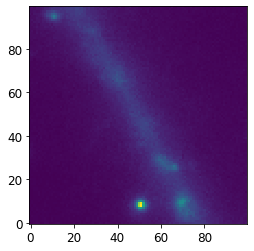

In [16]:
import astropy.io.fits as pyfits

h = pyfits.open(f'../{energy_threshold}/ccube_00.fits')
h.info()
counts = h[0].data
counts.shape
plt.figure()
plt.imshow(np.sum(counts,axis=0),interpolation='nearest',origin='lower')

In [17]:
gta.print_roi()

2023-02-02 12:10:22 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000       nan      3399.1
4FGL J1811.5-1925   PointSource    PowerLaw          0.280       nan       487.1
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537       nan       720.6
4FGL J1811.5-1844   PointSource    LogParabola       0.741       nan      1577.9
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166       nan      2671.3
4FGL J1818.1-2000   PointSource    LogParabola       1.921       nan       543.3
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928       nan      8106.3
4FGL J1804.9-1745   PointSource    PowerLaw          2.109       nan       406.8
4FGL J1806.2-2126   PointSource    LogParabola       2.221       nan      3486.6
4FGL J1818.5-2036   PointSource    PowerLaw          2.2

In [18]:
print(gta.roi['4FGL J1810.3-1925e'])

Name           : 4FGL J1810.3-1925e
Associations   : ['4FGL J1810.3-1925e']
RA/DEC         :    272.590/   -19.430
GLON/GLAT      :     11.048/    -0.118
TS             : nan
Npred          : 3399.06
Flux           : 7.082e-09 +/-      nan
EnergyFlux     : 1.526e-05 +/-      nan
SpatialModel   : RadialDisk
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.882e-12 +/-   2.89e-13
b'alpha'       :      2.412 +/-     0.1268
b'beta'        :     0.2855 +/-    0.09529
b'Eb'          :       1747 +/-        nan


In [19]:
gta.optimize()

2023-02-02 12:10:26 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', '4FGL J1809.8-2332', '4FGL J1801.3-2326e', '4FGL J1826.2-1450', '4FGL J1813.1-1737e']


/lfs/l7/hawc/users/vikasj78/mamba/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS: 1528827.379
Fitting shape 4FGL J1809.8-2332 TS:  56258.444
Fitting shape 4FGL J1826.2-1450 TS:   5937.963
Fitting shape 4FGL J1801.3-2326e TS:   3070.555
Fitting shape 4FGL J1803.1-2148 TS:   1854.546
Fitting shape 4FGL J1801.6-2326 TS:   1660.654
Fitting shape 4FGL J1813.1-1737e TS:   1112.947
Fitting shape 4FGL J1804.7-2144e TS:    706.895
Fitting shape 4FGL J1827.4-1445 TS:    527.046
Fitting shape 4FGL J1806.2-2126 TS:    492.192
Fitting shape 4FGL J1833.6-2103 TS:    488.708
Fitting shape 4FGL J1818.6-1533 TS:    406.584
Fitting shape isodiff TS:    375.506
Fitting shape 4FGL J1805.6-2136e TS:    340.323
Fitting shape 4FGL J1830.7-1634 TS:    324.484
Fitting shape 4FGL J1817.1-1742 TS:    256.210
Fitting shape 4FGL J1820.4-1609c TS:    239.596
Fitting shape 4FGL J1810.3-1925e TS:    229.684
Fitting shape 4FGL J1800.9-2407 TS:    212.258
Fitting shape 4FGL J1759.7-2141 TS:    181.377
Fitting shape 4FGL J1801.8-2358 TS:    176.696
Fitting shape 4FGL J1819.9

2023-02-02 12:15:50 INFO    GTAnalysis.optimize(): Finished
2023-02-02 12:15:50 INFO    GTAnalysis.optimize(): LogLike: 1787690.703649 Delta-LogLike: 2348.548978
2023-02-02 12:15:50 INFO    GTAnalysis.optimize(): Execution time: 324.48 s


{'loglike0': 1785342.1546707852,
 'loglike1': 1787690.7036485376,
 'dloglike': 2348.548977752449,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

In [20]:
print(gta.roi['4FGL J1810.3-1925e'])

Name           : 4FGL J1810.3-1925e
Associations   : ['4FGL J1810.3-1925e']
RA/DEC         :    272.590/   -19.430
GLON/GLAT      :     11.048/    -0.118
TS             : 278.68
Npred          : 3643.17
Flux           : 7.481e-09 +/- 4.67e-10
EnergyFlux     : 2.013e-05 +/- 2.79e-06
SpatialModel   : RadialDisk
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.777e-12 +/-  1.824e-13
b'alpha'       :      2.683 +/-     0.1101
b'beta'        :   -0.03643 +/-      0.047
b'Eb'          :       1747 +/-        nan


In [21]:
gta.print_roi()

2023-02-02 12:15:50 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000    278.68      3643.2
4FGL J1811.5-1925   PointSource    PowerLaw          0.280     28.58       434.9
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537     62.42      1162.9
4FGL J1811.5-1844   PointSource    LogParabola       0.741    115.73      1510.4
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166    111.47      2554.6
4FGL J1818.1-2000   PointSource    LogParabola       1.921     85.42       518.5
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928   1354.62      8690.8
4FGL J1804.9-1745   PointSource    PowerLaw          2.109     51.76       539.7
4FGL J1806.2-2126   PointSource    LogParabola       2.221    514.24      3450.2
4FGL J1818.5-2036   PointSource    PowerLaw          2.2

#### Lets see the residuals in the default model

2023-02-02 12:15:51 INFO    GTAnalysis.residmap(): Generating residual maps
2023-02-02 12:15:51 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2023-02-02 12:15:52 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2023-02-02 12:15:58 INFO    GTAnalysis.residmap(): Finished residual maps
2023-02-02 12:16:06 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/resid_after_opt_pointsource_powerlaw_2.00_residmap.npy
2023-02-02 12:16:06 INFO    GTAnalysis.residmap(): Execution time: 15.30 s


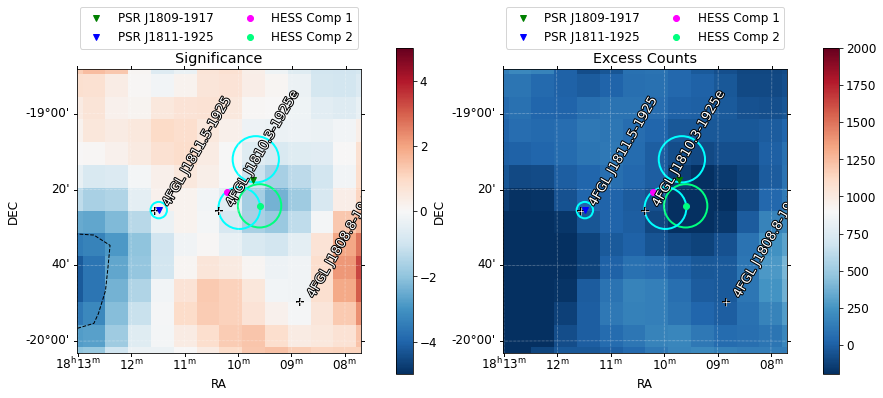

In [22]:
name = 'resid_after_opt'
resid_after_opt = gta.residmap(name,model={'SpatialModel' : 'PointSource', 'Index' : 2.0}, write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_after_opt,levels_wo_source,name)

2023-02-02 12:16:11 INFO    GTAnalysis.residmap(): Generating residual maps
2023-02-02 12:16:11 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2023-02-02 12:16:13 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2023-02-02 12:16:18 INFO    GTAnalysis.residmap(): Finished residual maps
2023-02-02 12:16:26 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/resid_after_opt_with_j1810_pointsource_powerlaw_2.00_residmap.npy
2023-02-02 12:16:26 INFO    GTAnalysis.residmap(): Execution time: 15.18 s


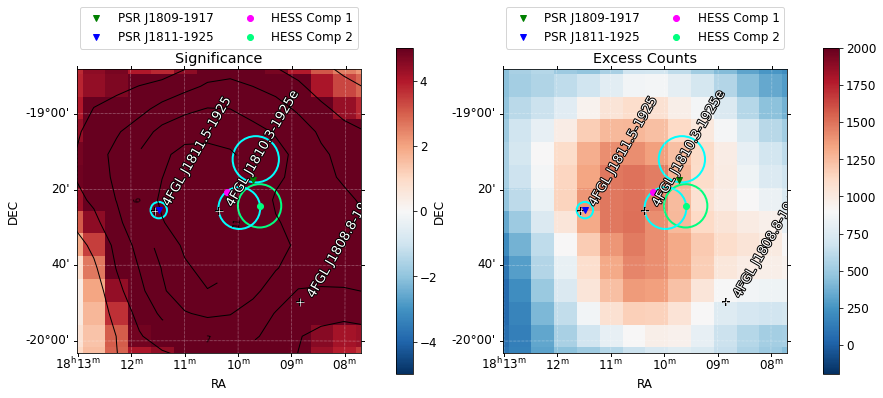

In [23]:
name = 'resid_after_opt_with_j1810'
resid_after_opt_with_j1810 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J1810.3-1925e'], write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_after_opt_with_j1810,levels_with_source,name)

2023-02-02 12:16:31 INFO    GTAnalysis.residmap(): Generating residual maps
2023-02-02 12:16:31 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2023-02-02 12:16:33 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2023-02-02 12:16:38 INFO    GTAnalysis.residmap(): Finished residual maps
2023-02-02 12:16:47 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/resid_after_opt_with_j1810_and_j1811_pointsource_powerlaw_2.00_residmap.npy
2023-02-02 12:16:47 INFO    GTAnalysis.residmap(): Execution time: 15.09 s


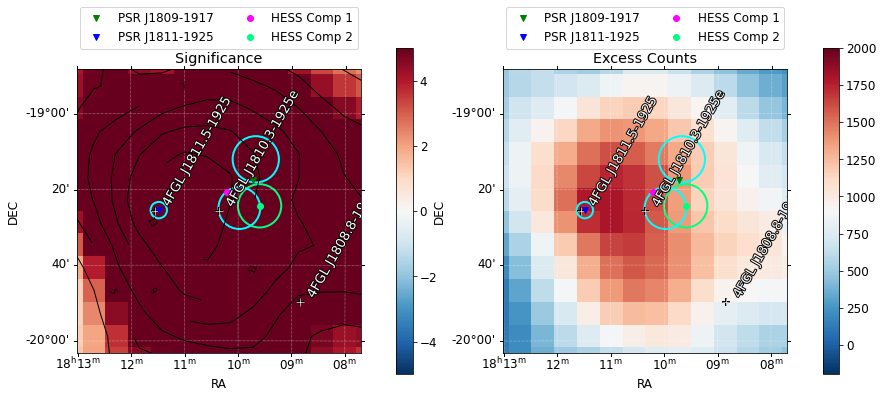

In [24]:
name = 'resid_after_opt_with_j1810_and_j1811'
resid_after_opt_with_j1810_and_j1811 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J1810.3-1925e','4FGL J1811.5-1925'], write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_after_opt_with_j1810_and_j1811,levels_with_source,name)

#### Extension of j1810 in default fermi model, gaussian and radial disk

In [25]:
%%capture
name = 'extension_gauss_default_fermi_model'
extension_gauss_default_fermi_model = gta.extension('4FGL J1810.3-1925e',width=np.linspace(0.1,0.75,10).tolist());
gta.write_roi(name)
plot_extension(extension_gauss_default_fermi_model, name)

2023-02-02 12:16:52 INFO    GTAnalysis.extension(): Running extension fit for 4FGL J1810.3-1925e
2023-02-02 12:17:28 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-02-02 12:17:39 INFO    GTAnalysis._extension(): Generating TS map.
2023-02-02 12:17:41 INFO    GTAnalysis._extension(): Testing point-source model.
2023-02-02 12:17:46 INFO    GTAnalysis._extension(): Best-fit extension: 0.4307 + 0.0344 - 0.0334
2023-02-02 12:17:46 INFO    GTAnalysis._extension(): TS_ext:        95.770
2023-02-02 12:17:46 INFO    GTAnalysis._extension(): Extension UL: 0.4885
2023-02-02 12:17:46 INFO    GTAnalysis._extension(): LogLike:  1787689.832 DeltaLogLike:       -0.872
2023-02-02 12:17:46 INFO    GTAnalysis.extension(): Finished extension fit.
2023-02-02 12:17:51 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSpars

In [26]:
print(gta.roi['4FGL J1810.3-1925e'])

Name           : 4FGL J1810.3-1925e
Associations   : ['4FGL J1810.3-1925e']
RA/DEC         :    272.590/   -19.430
GLON/GLAT      :     11.048/    -0.118
TS             : 278.68
Npred          : 3643.17
Flux           : 7.481e-09 +/- 4.67e-10
EnergyFlux     : 2.013e-05 +/- 2.79e-06
SpatialModel   : RadialDisk
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.777e-12 +/-          0
b'alpha'       :      2.683 +/-          0
b'beta'        :   -0.03643 +/-          0
b'Eb'          :       1747 +/-        nan


In [27]:
%%capture
name = 'extension_disk_default_fermi_model'
extension_disk_default_fermi_model = gta.extension('4FGL J1810.3-1925e',width=np.linspace(0.1,0.75,10).tolist(),spatial_model='RadialDisk')
gta.write_roi(name)
plot_extension(extension_disk_default_fermi_model, name)

2023-02-02 12:18:06 INFO    GTAnalysis.extension(): Running extension fit for 4FGL J1810.3-1925e
2023-02-02 12:18:42 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-02-02 12:18:53 INFO    GTAnalysis._extension(): Generating TS map.
2023-02-02 12:18:55 INFO    GTAnalysis._extension(): Testing point-source model.
2023-02-02 12:19:00 INFO    GTAnalysis._extension(): Best-fit extension: 0.4032 + 0.0360 - 0.0294
2023-02-02 12:19:00 INFO    GTAnalysis._extension(): TS_ext:        98.466
2023-02-02 12:19:00 INFO    GTAnalysis._extension(): Extension UL: 0.4605
2023-02-02 12:19:00 INFO    GTAnalysis._extension(): LogLike:  1787691.153 DeltaLogLike:        1.310
2023-02-02 12:19:00 INFO    GTAnalysis.extension(): Finished extension fit.
2023-02-02 12:19:04 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSpars

#### Let's fit the extension and position of 4FGL J1810.3-1925e and update it in the model

In [28]:
%%capture
name = 'extension_gauss_and_position_fit_j1810_before_fit_final'
extension_gauss_and_position_fit_j1810_before_fit_final = gta.extension('4FGL J1810.3-1925e', fit_position=True,  
                                                                   update=True, width_max=5.0, sqrt_ts_threshold=3.0, spatial_model='RadialGaussian')
gta.write_roi(name)
plot_extension(extension_gauss_and_position_fit_j1810_before_fit_final, name)

2023-02-02 12:19:20 INFO    GTAnalysis.extension(): Running extension fit for 4FGL J1810.3-1925e
2023-02-02 12:20:40 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.430 Offset =    0.050 LogLikelihood = 1787691.37 Delta-LogLikelihood =     0.08
2023-02-02 12:21:56 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.440 Offset =    0.053 LogLikelihood = 1787691.41 Delta-LogLikelihood =     0.05
2023-02-02 12:21:56 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-02-02 12:22:16 INFO    GTAnalysis._extension(): Generating TS map.
2023-02-02 12:22:19 INFO    GTAnalysis._extension(): Testing point-source model.
2023-02-02 12:22:26 INFO    GTAnalysis._extension(): Best-fit extension: 0.4400 + 0.0333 - 0.0325
2023-02-02 12:22:26 INFO    GTAnalysis._extension(): TS_ext:        103.137
2023-02-02 12:22:26 INFO    GTAnalysis._extension(): Extension UL: 0.4962
2023-02-02 12:22:26 INFO    GTAnalysis._extension(): LogLike:  1787691.409 DeltaLogLike:        1.

#### Get the best fit source locations with errors

In [29]:
loc_j1811 = gta.localize('4FGL J1811.5-1925', make_plots=True)
print('RA:',loc_j1811['ra'],'+/-',loc_j1811['ra_err'])
print('Dec:',loc_j1811['dec'],'+/-',loc_j1811['dec_err'])

2023-02-02 12:22:47 INFO    GTAnalysis.localize(): Running localization for 4FGL J1811.5-1925
2023-02-02 12:23:08 INFO    GTAnalysis._localize(): Localization succeeded.
2023-02-02 12:23:08 INFO    GTAnalysis._localize(): Updating source 4FGL J1811.5-1925 to localized position.
2023-02-02 12:23:08 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1811.5-1925
2023-02-02 12:23:08 INFO    GTAnalysis.add_source(): Adding source 4FGL J1811.5-1925
2023-02-02 12:23:12 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  272.8737 +/-   0.0249,  -19.4103 +/-   0.0270)
(glon,glat) = (   11.1946 +/-   0.0284,   -0.3427 +/-   0.0233)
offset =   0.0211 r68 =   0.0390 r95 =   0.0630 r99 =   0.0781
2023-02-02 12:23:12 INFO    GTAnalysis._localize(): LogLike:  1787691.653 DeltaLogLike:        0.243
2023-02-02 12:23:12 INFO    GTAnalysis.localize(): Finished localization.
2023-02-02 12:23:21 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is dis

RA: 272.8736817317641 +/- 0.02494469074411197
Dec: -19.410254786292608 +/- 0.026990762826276517


In [30]:
gta.write_roi('before_final_fit')

2023-02-02 12:23:21 INFO    GTBinnedAnalysis.write_xml(): Writing /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/before_final_fit_00.xml...
2023-02-02 12:23:21 INFO    GTAnalysis.write_fits(): Writing /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/before_final_fit.fits...
2023-02-02 12:23:37 INFO    GTAnalysis.write_roi(): Writing /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/before_final_fit.npy...


In [31]:
print(gta.roi['4FGL J1810.3-1925e'])
print(gta.roi['4FGL J1811.5-1925'])

Name           : 4FGL J1810.3-1925e
Associations   : ['4FGL J1810.3-1925e']
RA/DEC         :    272.547/   -19.397
GLON/GLAT      :     11.058/    -0.066
TS             : 258.11
Npred          : 3627.00
Flux           : 7.161e-09 +/- 4.66e-10
EnergyFlux     :  2.11e-05 +/- 3.02e-06
SpatialModel   : RadialGaussian
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.653e-12 +/-  1.829e-13
b'alpha'       :      2.522 +/-     0.1085
b'beta'        :   -0.01121 +/-    0.04649
b'Eb'          :       1747 +/-        nan
Name           : 4FGL J1811.5-1925
Associations   : ['4FGL J1811.5-1925']
RA/DEC         :    272.874/   -19.410
GLON/GLAT      :     11.195/    -0.343
TS             : 37.03
Npred          : 592.64
Flux           : 1.177e-09 +/- 2.53e-10
EnergyFlux     : 4.342e-06 +/- 9.04e-07
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.464e-14 +/-  2.796e-15
b'Index'       :     -2.317 +/-     0.1472
b'Scale'       :       7

In [32]:
gta.load_roi('before_final_fit')

2023-02-02 16:16:39 INFO    GTAnalysis.load_roi(): Loading ROI file: /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/before_final_fit.npy
2023-02-02 16:16:39 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2023-02-02 16:17:01 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [33]:
print(gta.roi['4FGL J1810.3-1925e'])
print(gta.roi['4FGL J1811.5-1925'])

Name           : 4FGL J1810.3-1925e
Associations   : ['4FGL J1810.3-1925e']
RA/DEC         :    272.547/   -19.397
GLON/GLAT      :     11.058/    -0.066
TS             : 258.11
Npred          : 3627.00
Flux           : 7.161e-09 +/- 4.66e-10
EnergyFlux     :  2.11e-05 +/- 3.02e-06
SpatialModel   : RadialGaussian
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.653e-12 +/-  1.829e-13
b'alpha'       :      2.522 +/-     0.1085
b'beta'        :   -0.01121 +/-    0.04649
b'Eb'          :       1747 +/-        nan
Name           : 4FGL J1811.5-1925
Associations   : ['4FGL J1811.5-1925']
RA/DEC         :    272.874/   -19.410
GLON/GLAT      :     11.195/    -0.343
TS             : 37.03
Npred          : 592.64
Flux           : 1.177e-09 +/- 2.53e-10
EnergyFlux     : 4.342e-06 +/- 9.04e-07
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.464e-14 +/-  2.796e-15
b'Index'       :     -2.317 +/-    -0.1472
b'Scale'       :       7

In [34]:
# Free Normalization of all Sources within 2 deg of ROI center
gta.free_sources(distance=1.0,pars='norm')
gta.free_sources(minmax_ts=[None,25],free=False)
gta.free_sources(minmax_npred=[None,700],free=False)
# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
gta.free_source('isodiff')

2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Prefactor']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1818.5-2036     : ['Prefactor', 'Index']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1814.1-1710     : ['Prefactor', 'Index']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1759.6-1850     : ['Prefactor', 'Index']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1758.3-1920     : ['Prefactor', 'Index']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1813.1-1611     : ['Prefactor', 'Index']
2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1755.6-2050     : ['Prefactor', 'Index']
2023-02-02 16:17:01 INFO    

#### Let's now free 4FGL J1810.3-1925e and 4FGL J1811.5-1925 

In [35]:
gta.free_source('4FGL J1810.3-1925e')
gta.free_source('4FGL J1811.5-1925')

2023-02-02 16:17:01 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1811.5-1925     : ['Prefactor', 'Index']


In [36]:
fit_final = gta.fit()

2023-02-02 16:17:01 INFO    GTAnalysis.fit(): Starting fit.
2023-02-02 16:21:46 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-02-02 16:21:46 INFO    GTAnalysis.fit(): LogLike:  1787717.943 DeltaLogLike:       26.217 


In [37]:
print(gta.roi['4FGL J1810.3-1925e'])
print('Fit Quality: ',fit_final['fit_quality'])

Name           : 4FGL J1810.3-1925e
Associations   : ['4FGL J1810.3-1925e']
RA/DEC         :    272.547/   -19.397
GLON/GLAT      :     11.058/    -0.066
TS             : 257.87
Npred          : 3751.81
Flux           : 7.727e-09 +/- 7.49e-10
EnergyFlux     : 2.299e-05 +/- 3.39e-06
SpatialModel   : RadialGaussian
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.946e-12 +/-  3.022e-13
b'alpha'       :       2.53 +/-     0.1161
b'beta'        :   -0.01804 +/-    0.04349
b'Eb'          :       1747 +/-        nan
Fit Quality:  3


In [38]:
print(gta.roi['4FGL J1811.5-1925'])
print('Fit Quality: ',fit_final['fit_quality'])

Name           : 4FGL J1811.5-1925
Associations   : ['4FGL J1811.5-1925']
RA/DEC         :    272.874/   -19.410
GLON/GLAT      :     11.195/    -0.343
TS             : 45.35
Npred          : 713.68
Flux           : 1.473e-09 +/- 3.41e-10
EnergyFlux     : 4.735e-06 +/- 1.08e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.681e-14 +/-   3.89e-15
b'Index'       :     -2.408 +/-     0.2006
b'Scale'       :       7480 +/-        nan
Fit Quality:  3


2023-02-02 16:21:46 INFO    GTBinnedAnalysis.write_xml(): Writing /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/fit_final_00.xml...
2023-02-02 16:21:46 INFO    GTAnalysis.write_fits(): Writing /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/fit_final.fits...
2023-02-02 16:22:14 INFO    GTAnalysis.write_roi(): Writing /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/fit_final.npy...


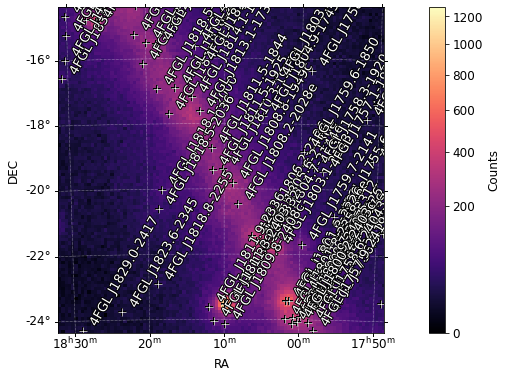

In [39]:
gta.write_roi('fit_final',make_plots=True)

In [40]:
from IPython.display import Image, display
from glob import glob

In [41]:
pngs = glob(f'../{energy_threshold}/*.png')

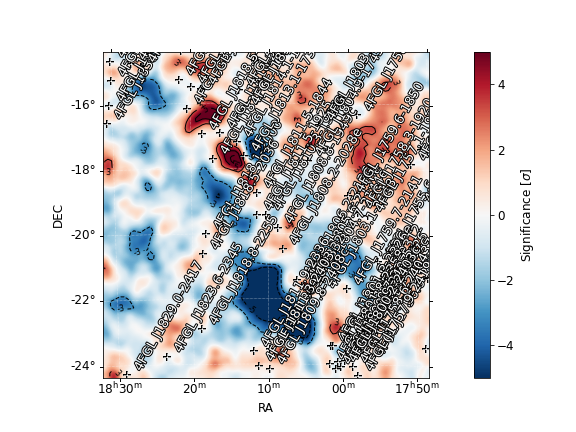

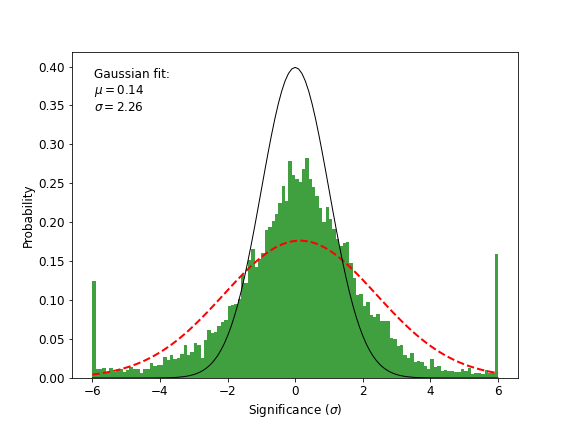

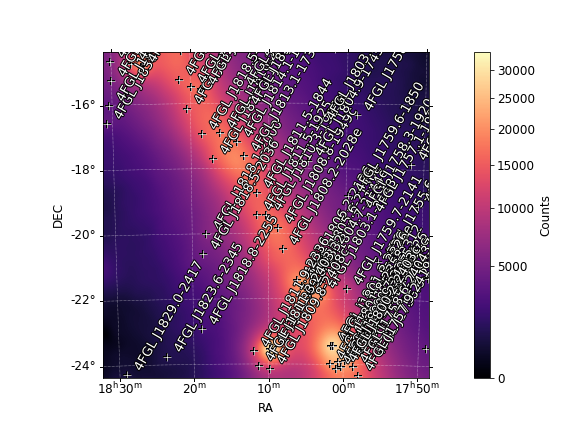

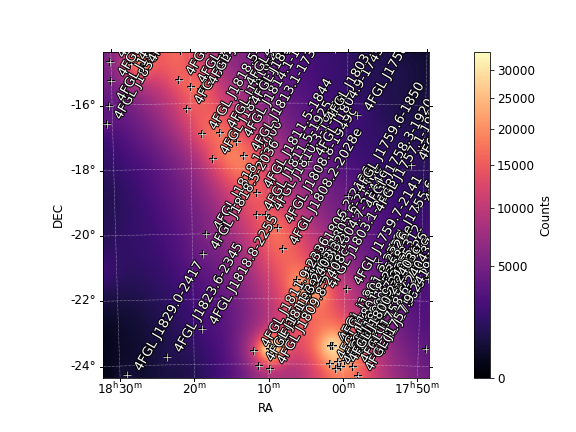

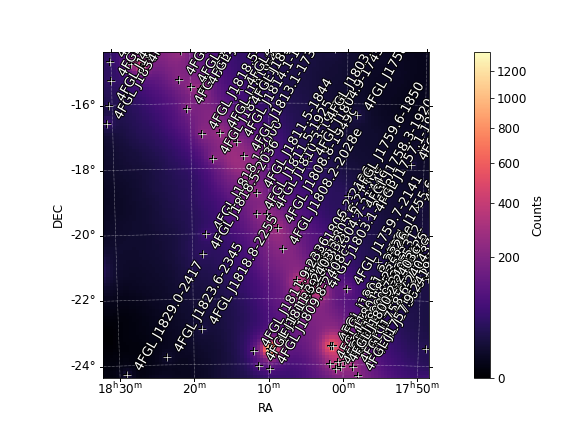

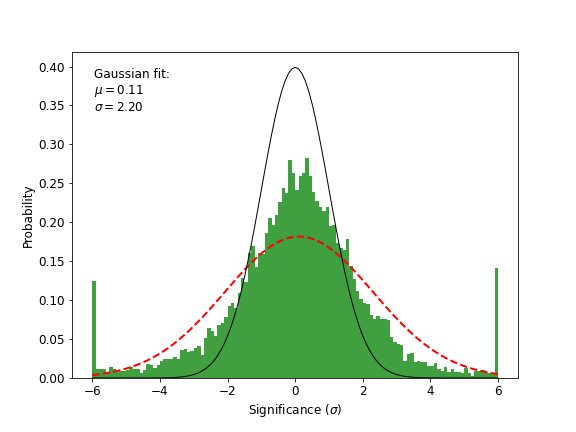

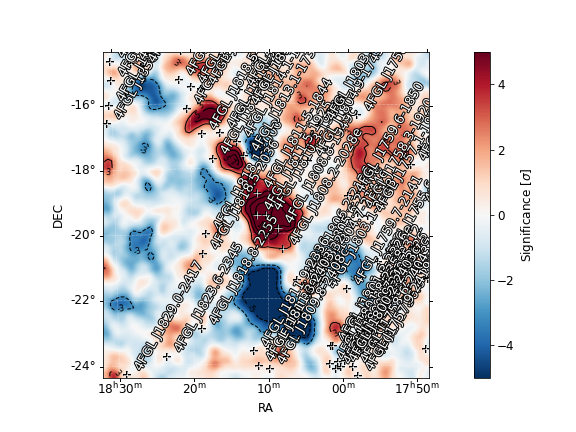

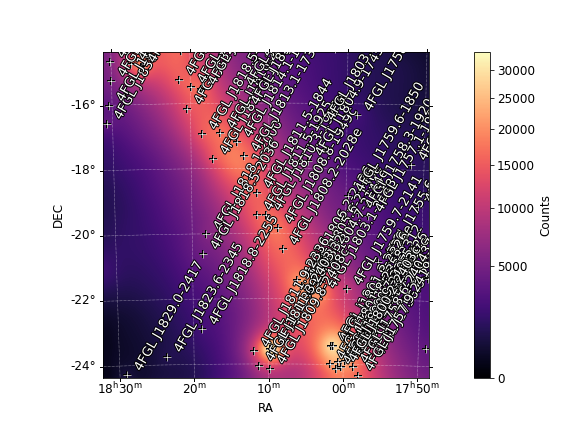

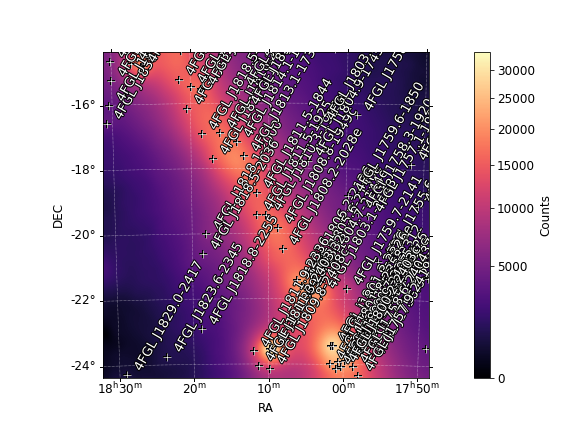

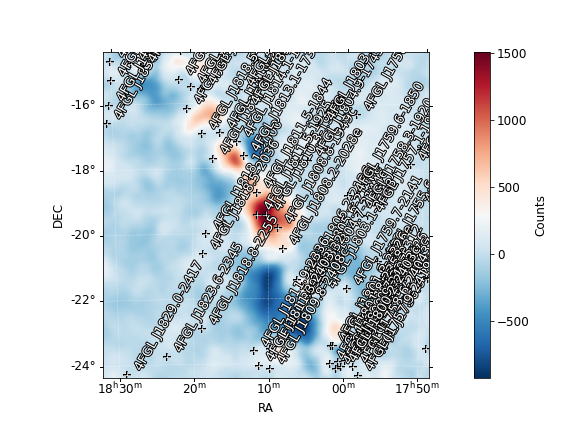

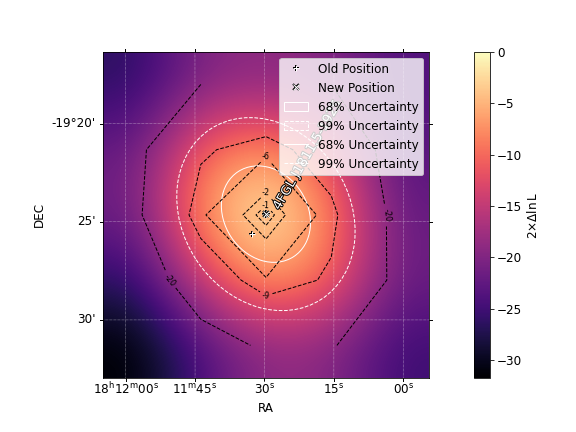

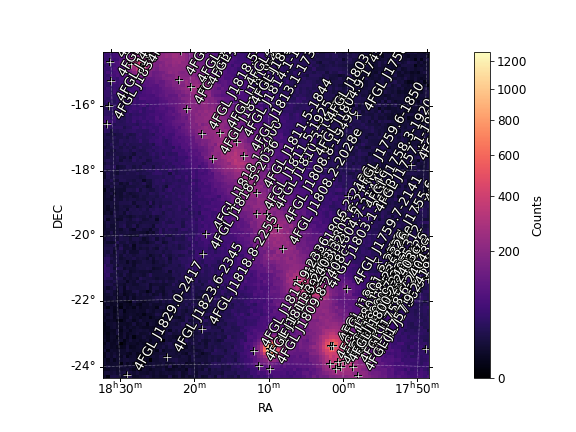

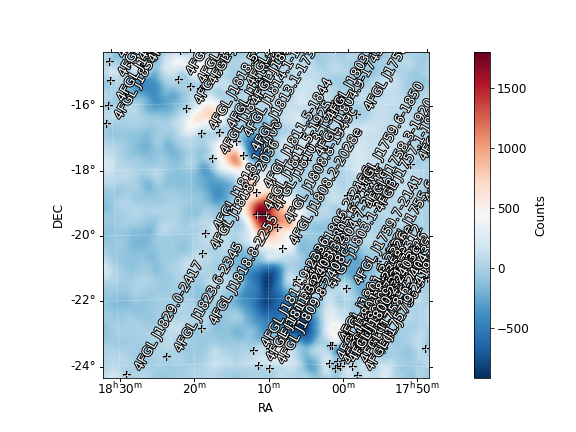

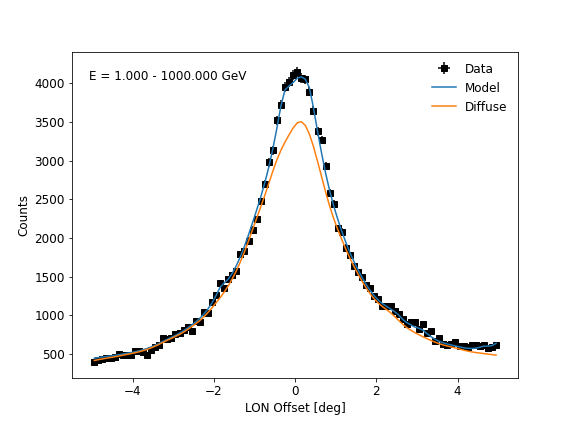

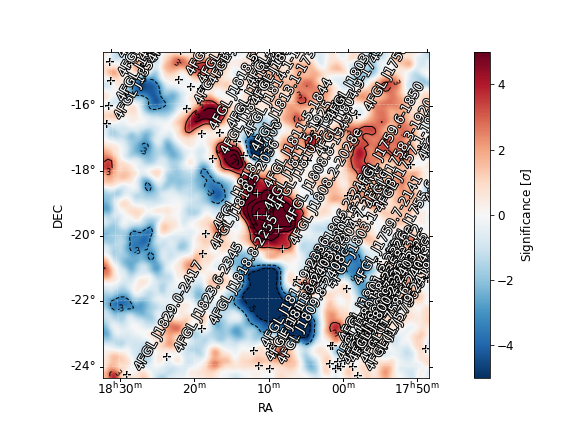

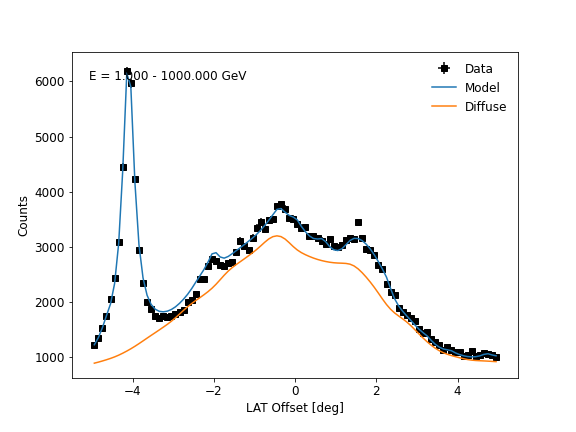

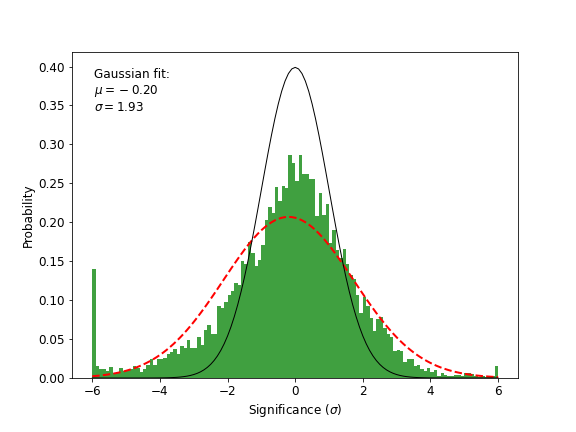

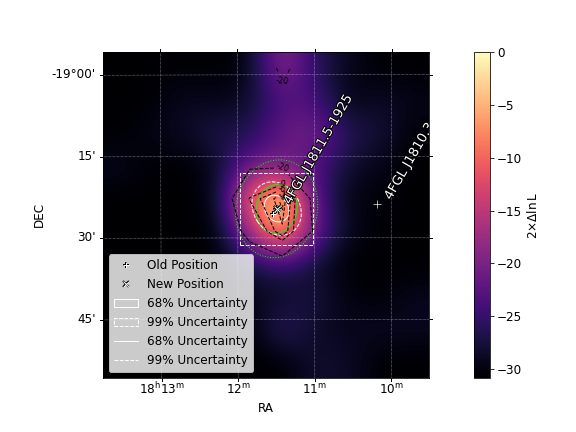

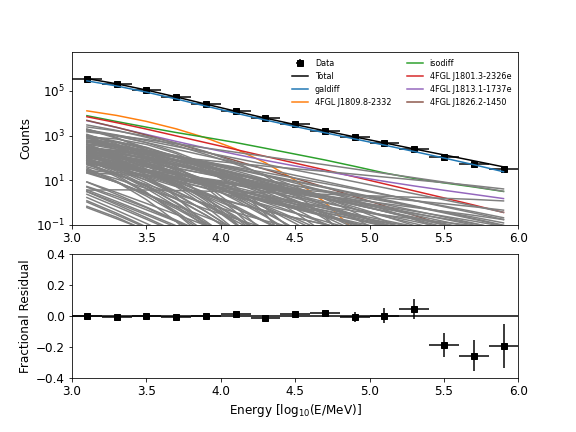

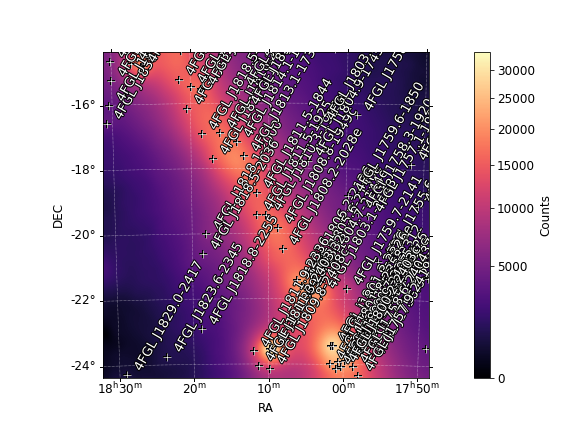

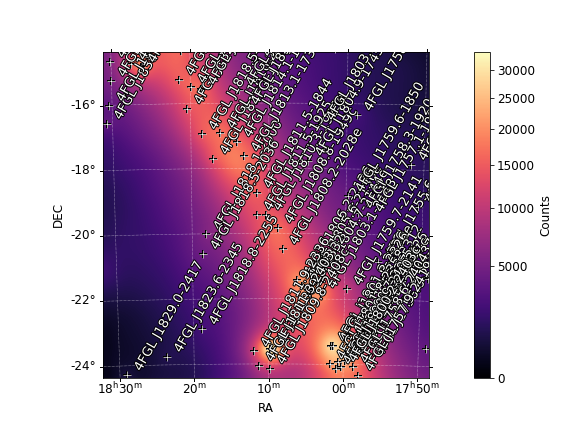

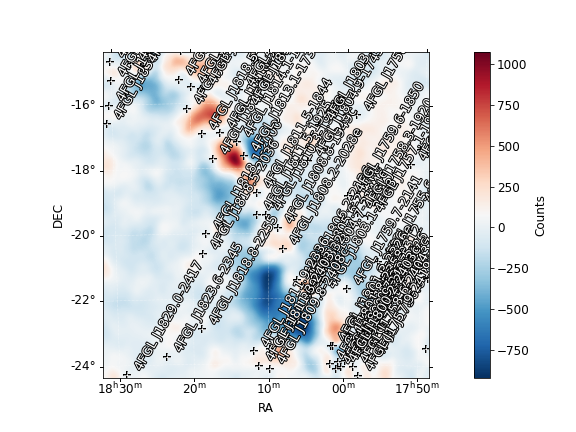

In [42]:
if(True):
    for png in pngs:
        my_image = Image(png)
        display(my_image)

#### lets look at the residual after the final fit

2023-02-02 16:22:24 INFO    GTAnalysis.residmap(): Generating residual maps
2023-02-02 16:22:24 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2023-02-02 16:22:25 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2023-02-02 16:22:31 INFO    GTAnalysis.residmap(): Finished residual maps
2023-02-02 16:22:39 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/resid_fit_final_pointsource_powerlaw_2.00_residmap.npy
2023-02-02 16:22:39 INFO    GTAnalysis.residmap(): Execution time: 15.44 s


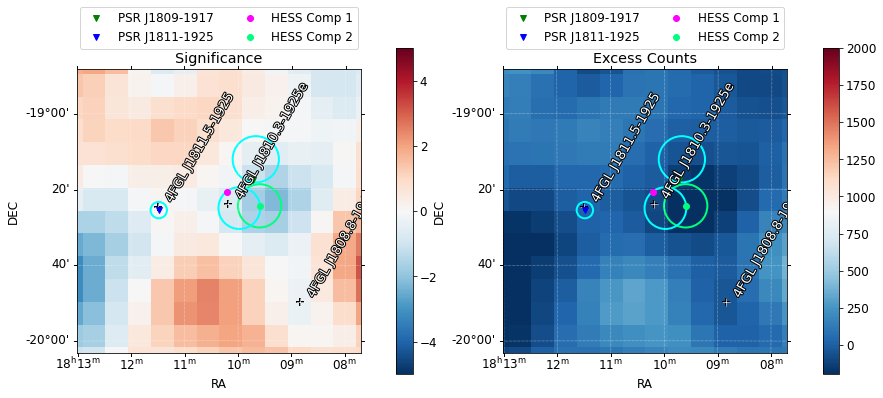

In [43]:
name = 'resid_fit_final'
resid_fit_final = gta.residmap(name,model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_fit_final,levels_wo_source,name)

2023-02-02 16:22:44 INFO    GTAnalysis.residmap(): Generating residual maps
2023-02-02 16:22:44 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2023-02-02 16:22:46 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2023-02-02 16:22:51 INFO    GTAnalysis.residmap(): Finished residual maps
2023-02-02 16:22:59 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/resid_fit_final_with_j1810_pointsource_powerlaw_2.00_residmap.npy
2023-02-02 16:22:59 INFO    GTAnalysis.residmap(): Execution time: 14.52 s


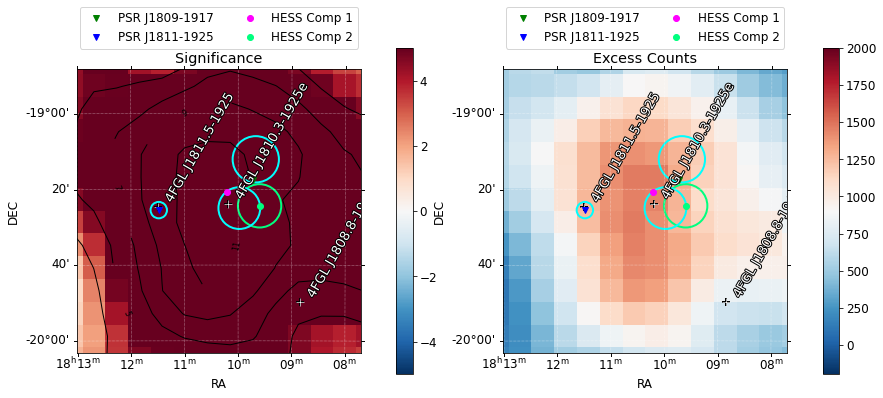

In [44]:
name = 'resid_fit_final_with_j1810'
resid_fit_final_with_j1810 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J1810.3-1925e'], write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_fit_final_with_j1810,levels_with_source,name)

2023-02-02 16:23:04 INFO    GTAnalysis.residmap(): Generating residual maps
2023-02-02 16:23:04 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2023-02-02 16:23:06 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2023-02-02 16:23:11 INFO    GTAnalysis.residmap(): Finished residual maps
2023-02-02 16:23:19 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeVSparseEnergyBinsAfterReviewSysLo/resid_fit_final_with_j1810_and_j1811_pointsource_powerlaw_2.00_residmap.npy
2023-02-02 16:23:19 INFO    GTAnalysis.residmap(): Execution time: 14.68 s


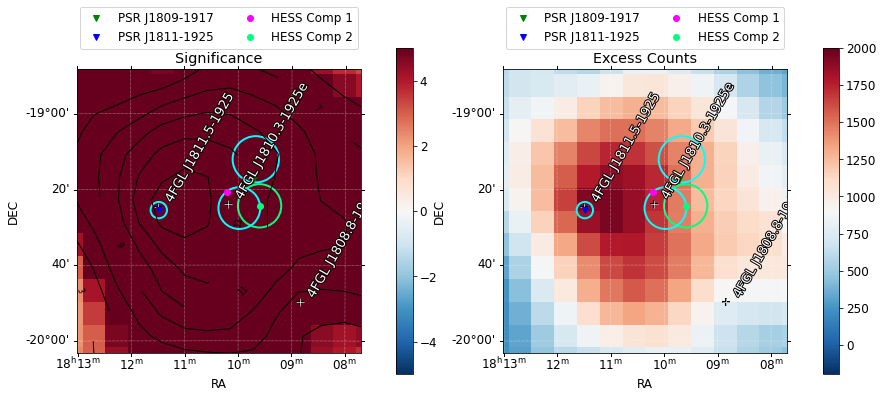

In [45]:
name = 'resid_fit_final_with_j1810_and_j1811'
resid_fit_final_with_j1810_and_j1811 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['4FGL J1810.3-1925e','4FGL J1811.5-1925'], write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_fit_final_with_j1810_and_j1811,levels_with_source,name)

#### Let's now get the  spectrum

In [46]:
source_name = '4FGL J1810.3-1925e'
result_name = 'fit_final'
sed_j1810_fit_final = gta.sed(source_name)
plot_spectrum(result_name, sed_j1810_fit_final, source_name)

2023-02-02 16:23:24 INFO    GTAnalysis.sed(): Computing SED for 4FGL J1810.3-1925e
2023-02-02 16:24:08 INFO    GTAnalysis._make_sed(): Fitting SED
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1810.3-1925e    : ['alpha', 'beta']
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1811.5-1925     : ['Index']
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1808.8-1949c    : ['Index']
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1811.5-1844     : ['alpha', 'beta']
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1808.2-2028e    : ['alpha', 'beta']
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1813.1-1737e    : ['alpha', 'beta']
2023-02-02 16:24:08 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1806.2-2126     : ['alpha', 'beta']
2023-02-02 16:24:08 INFO    GTAnalysis.free

RuntimeError: Requested energy, 1e+06, lies outside the range of the input file, 31.6228, 1e+06

In [ ]:
print(gta.roi['4FGL J1810.3-1925e'])
print('Fit Quality: ',fit_final['fit_quality'])

In [ ]:
source_name = '4FGL J1811.5-1925'
result_name = 'fit_final'
sed_j1811_fit_final = gta.sed(source_name)
plot_spectrum(result_name, sed_j1811_fit_final, source_name)

In [ ]:
print(gta.roi['4FGL J1811.5-1925'])
print('Fit Quality: ',fit_final['fit_quality'])

#### Let's evaluate the extension again of 4FGL J1810.3-1925e

In [ ]:
%%capture
name = 'extension_gauss_after_fit_final'
extension_gauss_after_fit_final = gta.extension('4FGL J1810.3-1925e', width_max=5.0, sqrt_ts_threshold=3.0, spatial_model='RadialGaussian')
gta.write_roi(name)
plot_extension(extension_gauss_after_fit_final, name)

#### Extract the flux points for hess comp2

In [ ]:
gta.delete_source('comp2_on_fermi_fit')

In [ ]:
gta.add_source('comp2_on_fermi_fit',{'ra': hess_comp2_ra, 'dec': hess_comp2_dec,
                'SpectrumType' : 'PowerLaw',  
                'Index':{'scale':1, 'value':2.358459341, 'free':1, 'max':5, 'min':0},
                'Scale' : {'scale':1e3, 'value':1.746902125, 'free':0},
                'SpatialModel' : 'SpatialMap', 'Spatial_Filename': '/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/common_files/template_comp2_gammapy_loc.fits','prefactor':{'free':1}})

In [ ]:
gta.free_sources(free=False)
gta.free_source('comp2_on_fermi_fit')

In [ ]:
gta.print_params()

In [ ]:
fit_gammapy_template_comp2 = gta.fit()

In [ ]:
print(gta.roi['comp2_on_fermi_fit'])
print('Fit Quality: ',fit_gammapy_template_comp2['fit_quality'])

In [ ]:
gta.write_roi('fit_gammapy_template_comp2')

In [ ]:
name = 'resid_gammapy_template_comp2_on_fermipy_fit'
resid_gammapy_template_comp2_on_fermipy_fit = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0})
plot_sig_ex_maps(resid_gammapy_template_comp2_on_fermipy_fit,levels_wo_source,name)

In [ ]:
name = 'resid_gammapy_template_comp2_on_fermipy_fit_with_comp2'
resid_gammapy_template_comp2_on_fermipy_fit_with_comp2 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['comp2_on_fermi_fit'])
plot_sig_ex_maps(resid_gammapy_template_comp2_on_fermipy_fit_with_comp2,levels_with_source,name)

In [ ]:
source_name = 'comp2_on_fermi_fit'
result_name = 'fit_gammapy_template_comp2'
sed_comp2_fit_gammapy_template_comp2 = gta.sed(source_name)
plot_spectrum(result_name, sed_comp2_fit_gammapy_template_comp2, source_name)

In [ ]:
sed_comp2_fit_gammapy_template_comp2['ts']

#### Asymmetric gaussian fit (template from gammapy hess source fit)

In [ ]:
# Free Normalization of all Sources within 2 deg of ROI center
gta.free_sources(free=False)

#### gammapy comp1 template

In [ ]:
gta.delete_source('4FGL J1810.3-1925e')
gta.delete_source('comp2_on_fermi_fit')
gta.delete_source('comp1_only')
gta.delete_source('comp2')
gta.delete_source('comp2')

In [ ]:
gta.add_source('comp1_only',{'ra': hess_comp1_ra, 'dec': hess_comp1_dec,
                'SpectrumType' : 'LogParabola', 
                'norm':{'scale':1e-12, 'value':2.603447802, 'free':1 ,'max':10000, 'min':0}, 
                'alpha':{'scale':1, 'value':2.358459341, 'free':1, 'max':5, 'min':0},
                'beta':{'scale':0.1, 'value':0.4439698035, 'free':1, 'max':15, 'min':-5}, 
                'Eb' : {'scale':1e3, 'value':1.746902125, 'free':0},
                'SpatialModel' : 'SpatialMap', 
                'Spatial_Filename': '/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/common_files/template_comp1_gammapy_loc.fits', 'prefactor':{'free':1}})

In [ ]:
gta.free_source('comp1_only')

In [ ]:
gta.print_params()

In [ ]:
fit_gammapy_template_comp1 = gta.fit()

In [ ]:
print(gta.roi['comp1_only'])
print('Fit Quality: ',fit_gammapy_template_comp1['fit_quality'])

In [ ]:
gta.write_roi('fit_gammapy_template_comp1')

In [ ]:
name = 'resid_gammapy_template_comp1'
resid_gammapy_template_comp1 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_gammapy_template_comp1,levels_wo_source,name)

In [ ]:
name = 'resid_gammapy_template_comp1_with_comp1'
resid_gammapy_template_comp1_with_comp1 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['comp1_only'],write_fits=True,write_npy=True,make_plots=True)
plot_sig_ex_maps(resid_gammapy_template_comp1_with_comp1,levels_with_source,name)

#### Evaluate the flux points using gammapy template

In [ ]:
source_name = 'comp1_only'
result_name = 'fit_gammapy_template_comp1'
sed_comp1_fit_gammapy_template_comp1 = gta.sed(source_name)
plot_spectrum(result_name, sed_comp1_fit_gammapy_template_comp1, source_name)

#### add also gammapy comp2 template

In [ ]:
gta.delete_source('comp1_only')

In [ ]:
gta.delete_source('comp2')
gta.delete_source('comp1')

In [ ]:
gta.add_source('comp1',{'ra': hess_comp1_ra, 'dec': hess_comp1_dec,
                'SpectrumType' : 'LogParabola', 
                'norm':{'scale':1e-12, 'value':2.603447802, 'free':1 ,'max':10000, 'min':0}, 
                'alpha':{'scale':1, 'value':2.358459341, 'free':1, 'max':5, 'min':0},
                'beta':{'scale':0.1, 'value':0.4439698035, 'free':1, 'max':15, 'min':-5}, 
                'Eb' : {'scale':1e3, 'value':1.746902125, 'free':0},
                'SpatialModel' : 'SpatialMap', 
                'Spatial_Filename': '/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/common_files/template_comp1_gammapy_loc.fits', 'prefactor':{'free':1}})
gta.add_source('comp2',{'ra': hess_comp2_ra, 'dec': hess_comp2_dec,
                'SpectrumType' : 'PowerLaw', 
                'Index':{'scale':1, 'value':2.358459341, 'free':1, 'max':5, 'min':0},
                'Scale' : {'scale':1e3, 'value':1.746902125, 'free':0},
                'SpatialModel' : 'SpatialMap', 
                'Spatial_Filename': '/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/common_files/template_comp2_gammapy_loc.fits','prefactor':{'free':1}})

In [ ]:
gta.free_sources(free=False)
gta.free_source('comp1')
gta.free_source('comp2')

In [ ]:
gta.print_params()

In [ ]:
fit_gammapy_template_comp1_and_comp2 = gta.fit()

In [ ]:
print(gta.roi['comp1'])
print(gta.roi['comp2'])
print('Fit Quality: ',fit_gammapy_template_comp1_and_comp2['fit_quality'])

In [ ]:
gta.write_roi('fit_gammapy_template_comp1_and_comp2')

In [ ]:
name = 'resid_fit_gammapy_template_comp1_and_comp2'
resid_fit_gammapy_template_comp1_and_comp2 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},)
plot_sig_ex_maps(resid_fit_gammapy_template_comp1_and_comp2,levels_wo_source,name)

In [ ]:
name = 'resid_fit_gammapy_template_comp1_and_comp2_with_comp2'
resid_fit_gammapy_template_comp1_and_comp2_with_comp2 = gta.residmap(name,
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['comp2'])
plot_sig_ex_maps(resid_fit_gammapy_template_comp1_and_comp2_with_comp2,levels_wo_source,name)

In [ ]:
source_name = 'comp1'
result_name = 'fit_gammapy_template_comp1_and_comp2'
sed_comp1_fit_gammapy_template_comp1_and_comp2 = gta.sed(source_name)
plot_spectrum(result_name, sed_comp1_fit_gammapy_template_comp1_and_comp2, source_name)

In [ ]:
source_name = 'comp2'
result_name = 'fit_gammapy_template_comp1_and_comp2'
sed_comp2_fit_gammapy_template_comp1_and_comp2 = gta.sed(source_name)
plot_spectrum(result_name, sed_comp2_fit_gammapy_template_comp1_and_comp2, source_name)

In [ ]:
sed_comp2_fit_gammapy_template_comp1_and_comp2['ts']

In [ ]:
gta.print_roi()

#### Load the Roi from a previous state

In [ ]:
gta.load_roi('fit_final')

In [ ]:
print(gta.roi['4FGL J1811.5-1925'])
print('Fit Quality: ',fit_final['fit_quality'])

In [ ]:
print(gta.roi['4FGL J1810.3-1925e'])
print('Fit Quality: ',fit_final['fit_quality'])

In [ ]:
print(gta.roi['galdiff'])
print('Fit Quality: ',fit_final['fit_quality'])